In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import csv
from bdots import *

In [2]:
cd "C:\Users\jdavies\Google Drive\MAGPIE\data"

C:\Users\jdavies\Google Drive\MAGPIE\data


In [6]:
filename="Carbon Reconnection Shot Book.csv"
shot=[]
current_start=[]
green=[]
thomson=[]
ir=[]
faraday=[]
ivv_start=[]
ivv_IF=[]



with open(filename, 'r') as f:
    reader = csv.reader(f, delimiter=',')
    next(reader)
    for row in reader:
        if row[6]=='Excellent':#row[1] =='2 x 16 Carbon, gap v gap' and 
            shot.append(row[0])
            current_start.append(row[5])
            try:
                green.append(int(row[7]))
            except ValueError:
                green.append(None)            
            try:
                thomson.append(int(row[8]))
            except ValueError:
                thomson.append(None)
            try:
                ir.append(int(row[9]))
            except ValueError:
                ir.append(None)
            try:
                faraday.append(int(row[10]))
            except ValueError:
                faraday.append(None)
            try:
                ivv_start.append(int(row[13]))
            except ValueError:
                ivv_start.append(None)
            try:
                ivv_IF.append(int(row[14]))
            except ValueError:
                ivv_IF.append(None)
                
pos={'Green Interferometry': 3, 'Thomson Scattering': 2, 'Faraday Rotation': 1, '12 Frame start': 0}
p=[v for v in pos.values()]
s=[s for s in pos.keys()]

In [326]:
class Diagnostic:
    def __init__(self, shot_numbers, timings, value, color, name):
        self.sn=[sn for t, sn in zip(timings, shot_numbers) if t is not None]
        self.t=[t for t in timings if t is not None]
        self.v=[value for t in timings if t is not None]
        self.c=color
        self.name=name
    def plot(self, ax, fs, size=40): 
        ax.scatter(self.t, self.v, s=size, c=self.c)
        sort_t=sorted(self.t)
        sort_sn=[sn for t,sn in sorted(zip(self.t,self.sn))]
        for i, t in enumerate(sort_t):
            d=abs(sort_t[i]-sort_t[i-1]) # work out how close next point it
            sep=2 #text should be this many 'ns' apart
            if d<sep and i is not 0:
                t=t+sep-d #if we're too close, move the text to be 'sep' ns apart
            ax.annotate('  '+sort_sn[i], (t,self.v[i]), rotation=45,horizontalalignment='left', verticalalignment='bottom', fontsize=fs)

In [339]:
Green=Diagnostic(shot, green, 3, 'green', 'Green Interferometry')
Thomson=Diagnostic(shot, thomson, 2, 'red', 'Thomson Scattering')
IR=Diagnostic(shot, ir, 1, 'purple', 'IR Interferometry')
Faraday=Diagnostic(shot, faraday, 0, 'blue', 'Faraday Polarimetry')
IVVstart=Diagnostic(shot, ivv_start, -1, 'black', '12 Frame')
IVVend=Diagnostic([sh+' end' for s, sh in  zip(ivv_start,shot) if s is not None], [s+11*e for s, e in  zip(ivv_start,ivv_IF) if s is not None], -1, 'black', '')

diags=[IVVstart, IVVend, Faraday, IR, Thomson, Green]
p=[D.v[0] for D in diags]
txt=[D.name for D in diags]

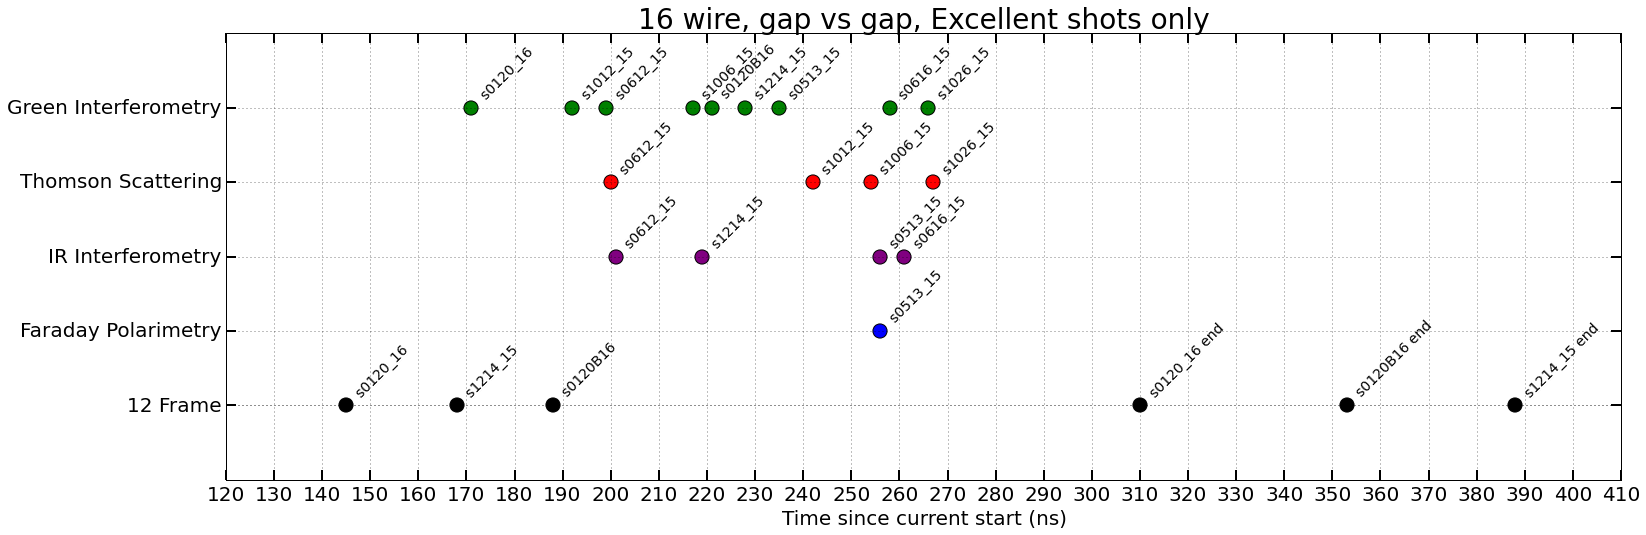

In [340]:
fig, ax=plt.subplots(figsize=(25,8))
for D in diags:
    D.plot(ax, fs=14, size=200)
ax.set_yticks(p)
ax.set_yticklabels(txt)
ax.set_xticks(np.arange(120,421,10))
ax.set_xlim([120,410])
ax.tick_params(labelsize=20, pad=5, length=10, width=2)
ax.set_xlabel('Time since current start (ns)', fontsize=20)
ax.set_title('16 rod, gap vs gap, Excellent shots only', fontsize=28)
ax.grid()

In [341]:
fig.savefig('Carbon timings.png', dpi=300)

In [14]:
for s in shot:
    r=Rogowskis(s)
    r.truncate(threshold=1)
    r.integrate()
    print(s+" I_Tot: "+str(round(r.I_Tot.max()/1e6,2))+" MA, I_2:"+str(round(r.I2.max()*8/1e6,2)))

s0513_15: using both Rogs
s0513_15 I_Tot: 0.77 MA, I_2:0.82
s0612_15: using both Rogs
s0612_15 I_Tot: 0.91 MA, I_2:0.76
s0616_15: using both Rogs
s0616_15 I_Tot: 0.89 MA, I_2:0.75
s1006_15: using both Rogs
s1006_15 I_Tot: 0.67 MA, I_2:0.71
s1012_15: using both Rogs
s1012_15 I_Tot: 0.68 MA, I_2:0.72
s1026_15: using both Rogs
s1026_15 I_Tot: 0.64 MA, I_2:0.67
s1214_15: using both Rogs
s1214_15 I_Tot: 0.92 MA, I_2:1.05
s0115_16: using both Rogs
s0115_16 I_Tot: 0.97 MA, I_2:1.18
s0120_16: using both Rogs
s0120_16 I_Tot: 0.94 MA, I_2:1.14
s0120B16: using both Rogs
s0120B16 I_Tot: 0.92 MA, I_2:1.1
s0121_16: using both Rogs
s0121_16 I_Tot: 1.04 MA, I_2:1.24
s0122_16: using Rog 1 only
s0122_16 I_Tot: 0.77 MA, I_2:0.04
s0201B16: using Rog 1 only
s0201B16 I_Tot: 0.92 MA, I_2:0.07
s0202_16: using Rog 1 only
s0202_16 I_Tot: 0.89 MA, I_2:0.05


In [11]:
round(1.02,2)

1.02